In [1]:
!pip install plotly

In [6]:
import plotly.offline as pt
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_excel('sales.xlsx')
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1.0,3.0,2010-10-13,Low,6.0,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49.0,293.0,2012-10-01,High,49.0,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50.0,293.0,2012-10-01,High,27.0,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80.0,483.0,2011-07-10,High,30.0,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85.0,515.0,2010-08-28,Not Specified,19.0,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


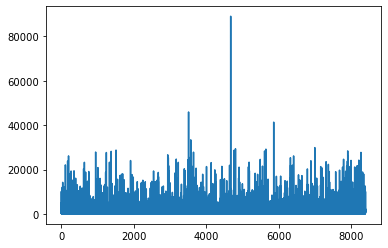

In [4]:
plt.plot(df.Sales)

In [5]:
pt.plot([{
    'x':df.index,
    'y':df.Sales
 }])

'temp-plot.html'

In [6]:
df_sp=df[['Sales','Profit']]
df_sp.head()

,Sales,Profit
0,261.5400,-213.2500
1,10123.0200,457.8100
2,244.5700,46.7075
3,4965.7595,1198.9710
4,394.2700,30.9400


In [7]:
pt.plot([{
    'x':df_sp.index,
    'y':df_sp[col],
    'name':col
}for col in df_sp.columns])

'temp-plot.html'

### Scatter Plot

In [8]:
import plotly.graph_objs as go

In [9]:
pt.plot([
    go.Scatter(
        x=df_sp.Sales,
        y=df_sp.Profit,
        mode='markers'
    
    )])

'temp-plot.html'

In [10]:
data= go.Scatter(
        x=df_sp.Sales,
        y=df_sp.Profit,
        mode='markers'
    )

pt.plot([data])

'temp-plot.html'

In [19]:
data= [go.Scatter(
        x=df_sp.Sales,
        y=df_sp.Profit,
        mode='markers')]

layout=go.Layout(title='Sales vs Profit chart',
                 xaxis=dict(title='Sales'),
                 yaxis=dict(title='Profit'))

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Bar Chart

In [22]:
order_priority=pd.pivot_table(df,values='Sales',index='Order Priority')
order_priority

,Sales
Order Priority,
Critical,1694.526538
High,1848.052240
Low,1908.506033
Medium,1755.028890
Not Specified,1661.700536


In [26]:
data= [go.Bar(
        x=order_priority.index,
        y=order_priority.Sales
        )]

layout=go.Layout(title='Avg sales by ship mode',
                 xaxis=dict(title='Order Priority'),
                 yaxis=dict(title='Avg Sales'))

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

In [4]:
# Group Bar chart

order_priority1=pd.pivot_table(df,values=['Sales','Profit'],index='Order Priority')
order_priority1

,Profit,Sales
Order Priority,,
Critical,113.729373,1694.526538
High,230.243022,1848.052240
Low,224.526069,1908.506033
Medium,200.522195,1755.028890
Not Specified,130.732613,1661.700536


In [9]:
Profit=go.Bar(
        x=order_priority1.index,
        y=order_priority1.Profit,
        name='Profit'
        )

Sales=go.Bar(
        x=order_priority1.index,
        y=order_priority1.Sales,
        name='Sales'
        )

data=[Profit,Sales]

layout=go.Layout(title='Sales vs Profit chart')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

In [17]:
# Stacked Bar chart

Profit=go.Bar(
        x=order_priority1.index,
        y=order_priority1.Profit,
        name='Profit'
        )

Sales=go.Bar(
        x=order_priority1.index,
        y=order_priority1.Sales,
        name='Sales'
        )

data=[Profit,Sales]

layout=go.Layout(title='Sales vs Profit chart',barmode='stack',barnorm='percent')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Line Chart

In [ ]:
data= [go.Scatter(
        x=df_sp.index,
        y=df_sp.Profit,
        mode='lines')]

layout=go.Layout(title='Sales vs Profit chart',
                 xaxis=dict(title='Sales'),
                 yaxis=dict(title='Profit'))

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

In [33]:
date=pd.pivot_table(df,columns=df['Order Date'].dt.year,values=['Sales','Profit']).T
date

,Profit,Sales
Order Date,,
2009,201.829441,1955.011359
2010,169.874593,1657.180581
2011,190.537456,1716.691659
2012,162.655475,1769.725910


In [35]:
# Multiple line chart

trace1=go.Scatter(
        x=date.index,
        y=date.Profit,
        mode='lines',
        name='profit'
)

trace2=go.Scatter(
        x=date.index,
        y=date.Sales,
        mode='markers+lines',
        name='sales'
)

data=[trace1,trace2]

layout=go.Layout(title='Sales vs Profit chart')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

In [38]:
trace=[go.Scatter(
        x=date.index,
        y=date[col],
        mode='markers+lines',
        name=col
)for col in date.columns]

layout=go.Layout(title='Sales vs Profit chart')

figure=go.Figure(data=trace,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Combo Chart

In [26]:
Profit=go.Scatter(
        x=order_priority1.index,
        y=order_priority1.Profit,
        mode='markers+lines',
        name='Profit'
)

Sales=go.Bar(
        x=order_priority1.index,
        y=order_priority1.Sales,
        name='Sales',
        marker=dict(color='rgb(100,255,233)')
        )

data=[Profit,Sales]

layout=go.Layout(title='Sales vs Profit chart')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Bubble Chart

In [34]:
trace=[go.Scatter(
        x=df.Sales,
        y=df.Profit,
        text=df['Customer Name'],
        mode='markers',
        marker=dict(size=150*df.Discount)
)]

layout=go.Layout(title='Sales vs Profit chart',
                 xaxis=dict(title='Sales'),
                 yaxis=dict(title='Profit'),
                 hovermode='closest')

figure=go.Figure(data=trace,layout=layout)

pt.plot(figure)

'temp-plot.html'

In [48]:
print(df.Sales[df['Order Priority']=='High'].sum())
print()
print(df['Sales'][df['Order Priority']=='High'].sum())

3267356.3609999996

3267356.3609999996


In [51]:
high=go.Scatter(
        x=df.Sales[df['Order Priority']=='High'],
        y=df.Profit[df['Order Priority']=='High'],
        name='High',
        mode='markers',
        marker=dict(size=150*df.Discount[df['Order Priority']=='High']))

medium=go.Scatter(
        x=df.Sales[df['Order Priority']=='Medium'],
        y=df.Profit[df['Order Priority']=='Medium'],
        name='Medium',
        mode='markers',
        marker=dict(size=150*df.Discount[df['Order Priority']=='Medium']))

low=go.Scatter(
        x=df.Sales[df['Order Priority']=='Low'],
        y=df.Profit[df['Order Priority']=='Low'],
        name='Low',
        mode='markers',
        marker=dict(size=150*df.Discount[df['Order Priority']=='Low']))

trace=[high,medium,low]

layout=go.Layout(title='Sales vs Profit chart',
                 xaxis=dict(title='Sales'),
                 yaxis=dict(title='Profit'),
                 hovermode='closest')

figure=go.Figure(data=trace,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Histogram

In [53]:
Profit=go.Histogram(
        x=df.Profit,
        name='Profit',
        opacity=0.5)

Sales=go.Histogram(
        x=df.Sales,
        name='Sales',
        opacity=0.5)

data=[Profit,Sales]

layout=go.Layout(title='Sales vs Profit Distribution')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Box Plot

In [58]:
df['Customer Segment'].value_counts()

Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

In [59]:
cor=df.Sales[df['Customer Segment']=='Corporate']
ho=df.Sales[df['Customer Segment']=='Home Office']
con=df.Sales[df['Customer Segment']=='Consumer']
sb=df.Sales[df['Customer Segment']=='Small Business']

In [61]:
t1=go.Box(y=cor,name='Corporate')
t2=go.Box(y=ho,name='Home Office')
t3=go.Box(y=con,name='Consumer')
t4=go.Box(y=sb,name='Small Business')

data=[t1,t2,t3,t4]

layout=go.Layout(title='Distribution of Sales by Customer Segment')

figure=go.Figure(data=data,layout=layout)

pt.plot(figure)

'temp-plot.html'

### Scatter Plot Matrix

In [2]:
import plotly.figure_factory as ff

In [9]:
order_data=df.loc[:,['Sales','Profit','Discount']]
order_data['index']=np.arange(1,len(order_data)+1)

fig=ff.create_scatterplotmatrix(order_data,diag='box',index='index',colormap='Portland',colormap_type='cat')
pt.plot(fig)

'temp-plot.html'

In [10]:
order_data=df.loc[:,['Sales','Profit','Discount','Order Priority']]


fig=ff.create_scatterplotmatrix(order_data,diag='box',index='Order Priority',colormap='Portland',colormap_type='cat')
pt.plot(fig)

'temp-plot.html'